In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### PARAMÈTRES

In [12]:
LATENT_C = 128
Z_H, Z_W = 4, 4
IMG_SIZE = 64
PATCH_SIZE = 128
BATCH_SIZE = 16
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### CHARGEMENT DE LA TEXTURE

On récupère l'image

In [13]:
real_img = Image.open("../Textures/Original/gravel.jpg").convert("RGB")

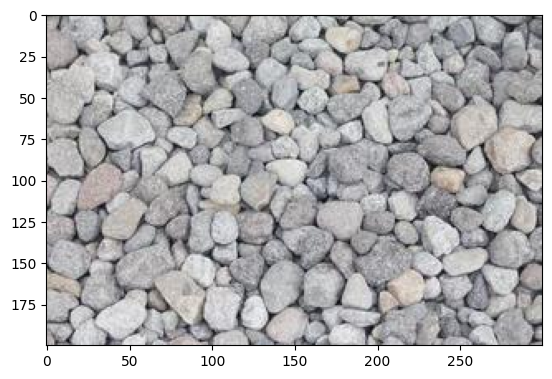

In [14]:
plt.imshow(real_img)
plt.show()

On définit un `transform` qui va permettre de sélectionner un patch aléatoire d'une image.

In [15]:
transform = transforms.Compose([
    transforms.RandomCrop(IMG_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # [0,1] → [-1,1]
])

Affichage d'un patch aléatoire

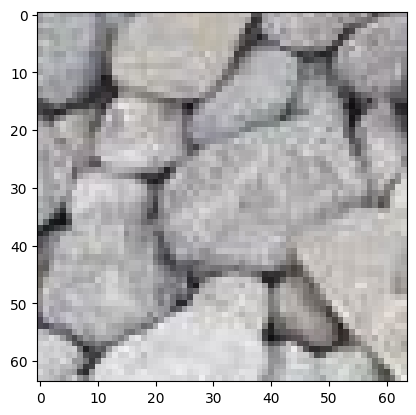

In [16]:
plt.imshow((transform(real_img).permute(1, 2, 0).cpu().numpy() + 1)/2)
plt.show()

### GÉNÉRATEUR

In [7]:
class Generator(nn.Module):
    def __init__(self, nz=50, ngf=[512, 256, 128, 64], nc=3):
        super().__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(nz, ngf[0], 5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(ngf[0]),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf[0], ngf[1], 5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(ngf[1]),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf[1], ngf[2], 5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(ngf[2]),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf[2], ngf[3], 5, stride=2, padding=2, output_padding=1),
            nn.BatchNorm2d(ngf[3]),
            nn.ReLU(True),

            nn.ConvTranspose2d(ngf[3], nc, 5, stride=2, padding=2, output_padding=1),
            nn.Tanh()
        )

    def forward(self, z):
        return self.net(z)

### DISCRIMINATEUR

In [8]:
class Discriminator(nn.Module):
    def __init__(self, nc=3, ndf=[64, 128, 256, 512]):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(nc, ndf[0], 5, stride=2, padding=2),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf[0], ndf[1], 5, stride=2, padding=2),
            nn.BatchNorm2d(ndf[1]),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf[1], ndf[2], 5, stride=2, padding=2),
            nn.BatchNorm2d(ndf[2]),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf[2], ndf[3], 5, stride=2, padding=2),
            nn.BatchNorm2d(ndf[3]),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf[3], 1, 5, stride=2, padding=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

In [9]:
# ======== INIT ========
G = Generator(LATENT_C).to(DEVICE)
D = Discriminator().to(DEVICE)
opt_G = optim.Adam(G.parameters(), lr=2e-4, betas=(0.5, 0.999))
opt_D = optim.Adam(D.parameters(), lr=2e-4, betas=(0.5, 0.999))

In [30]:
# ======== UTILS ========
def sample_z(batch_size):
    return torch.randn(batch_size, LATENT_C, Z_H, Z_W, device=DEVICE)

In [31]:
# === Data ===
dis_losses = []
gen_losses = []
real_scores = []
fake_scores = []

torch.Size([16, 3, 1024, 1024])


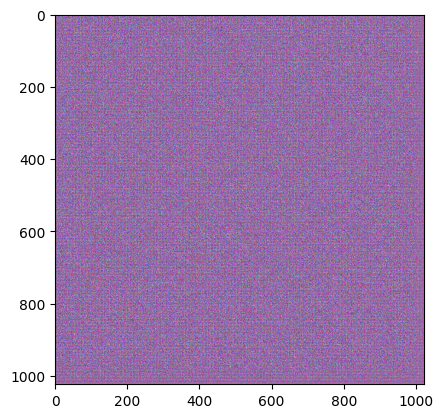

In [32]:
z = sample_z(BATCH_SIZE)
print(G(z).shape)
plt.imshow((G(z)[torch.randint(0,16,(1,)),:,:,:].squeeze().permute(1, 2, 0).cpu().detach().numpy() + 1)/2)
plt.show()

torch.Size([64, 3, 32, 32])
[0] Loss D: 1.3333, Loss G: 1.5319


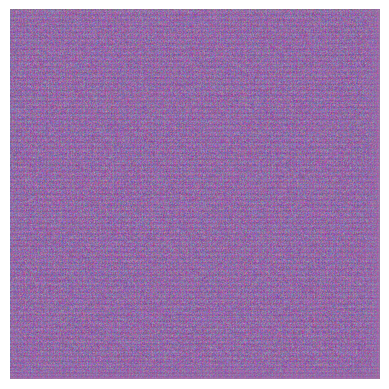

torch.Size([64, 3, 32, 32])
[1] Loss D: 0.7984, Loss G: 2.2396
torch.Size([64, 3, 32, 32])
[2] Loss D: 0.4186, Loss G: 2.7726
torch.Size([64, 3, 32, 32])
[3] Loss D: 0.2727, Loss G: 3.1274
torch.Size([64, 3, 32, 32])
[4] Loss D: 0.2285, Loss G: 3.5124
torch.Size([64, 3, 32, 32])
[5] Loss D: 0.1746, Loss G: 4.1775
torch.Size([64, 3, 32, 32])
[6] Loss D: 0.1069, Loss G: 4.3659
torch.Size([64, 3, 32, 32])
[7] Loss D: 0.1001, Loss G: 4.5101
torch.Size([64, 3, 32, 32])
[8] Loss D: 0.0853, Loss G: 4.8716
torch.Size([64, 3, 32, 32])
[9] Loss D: 0.0680, Loss G: 5.0024
torch.Size([64, 3, 32, 32])
[10] Loss D: 0.0673, Loss G: 4.9982
torch.Size([64, 3, 32, 32])
[11] Loss D: 0.0593, Loss G: 4.9843
torch.Size([64, 3, 32, 32])
[12] Loss D: 0.0501, Loss G: 5.1536
torch.Size([64, 3, 32, 32])
[13] Loss D: 0.0434, Loss G: 5.2292
torch.Size([64, 3, 32, 32])
[14] Loss D: 0.0407, Loss G: 5.1601
torch.Size([64, 3, 32, 32])
[15] Loss D: 0.0398, Loss G: 5.1440
torch.Size([64, 3, 32, 32])
[16] Loss D: 0.0348, 

In [ ]:
# ======== ENTRAÎNEMENT ========

real_label = 1
fake_label = 0
loss = nn.BCELoss()

for epoch in range(5001):
    z = sample_z(BATCH_SIZE)
    fake_img = G(z)

    # === Discriminateur ===
    real_patch = torch.cat([transform(real_img).unsqueeze(0) for _ in range(BATCH_SIZE)],dim=0)
    print(real_patch.shape)

    real_score = D(real_patch)
    fake_score = D(fake_img.detach())

    loss_D_real = loss(real_score, torch.zeros_like(real_score)+real_label)
    loss_D_fake = loss(fake_score, torch.zeros_like(fake_score)+fake_label)

    loss_D = loss_D_real + loss_D_fake
    
    opt_D.zero_grad()
    loss_D.backward()
    opt_D.step()

    # === Générateur ===
    
    score = D(fake_img)
    loss_G = loss(score, torch.zeros_like(score)+real_label)

    opt_G.zero_grad()
    loss_G.backward()
    opt_G.step()

    # === Visualisation ===

    dis_losses.append(loss_D.detach().numpy())
    gen_losses.append(loss_G.detach().numpy())
    real_scores.append(torch.mean(real_score).detach().numpy())
    fake_scores.append(torch.mean(fake_score).detach().numpy())
    
    print(f"[{epoch}] Loss D: {loss_D.item():.4f}, Loss G: {loss_G.item():.4f}")
    
    if epoch % 500 == 0:
        with torch.no_grad():
            test_z = sample_z(1)
            gen = G(test_z).squeeze().permute(1, 2, 0).cpu().numpy()
            gen = (gen + 1) / 2  # [-1,1] → [0,1]
            plt.imshow(gen)
            plt.axis("off")
            plt.show()



In [ ]:
plt.figure()
test_z = sample_z(1)
gen = G(test_z).squeeze().permute(1, 2, 0).cpu().detach().numpy()
gen = (gen + 1) / 2  # [-1,1] → [0,1]
plt.imshow(gen)
plt.axis("off")
#plt.savefig('../Generated/gravelGenSGAN2.png')
plt.show()

In [ ]:
plt.figure()
plt.plot(dis_losses,label='Discriminator losses')
plt.plot(gen_losses,label='Generator losses')
plt.legend()
plt.xlabel('Epochs')
plt.show()

In [ ]:
plt.figure()
plt.plot(real_scores,label='real scores')
plt.plot(fake_scores,label='fake scores')
plt.legend()
plt.xlabel('Epochs')
plt.show()